# SAXS&WAXS pipeline for data analysis, specifically get S(Q) curves


## Overview

* Setup: load packages/setup path
* Load and check form factors from h5 files (genreated by data reduction pipeline) 
* Load and check scattering curves from h5 files (genreated by data reduction pipeline) 
* Get Sq for one data
* Find the interested dataset and do batch analysis
* Produce images (png format)
* Append the (q,sq) results to a hdf file 
 

### DEV
* V0: Initialize the pipeline (2019/10/26 by YG yuzhang@bnl.gov)
* V1: Develop the pyScatt package  
* V2: Update the keys in the output h5 file

 

## TODLIST

* 1): Put codes into a package (Done)



# Load Package

In [47]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

In [2]:
#from pyScatt.IO import h5todict

In [3]:
%matplotlib inline

# Setup Paths

In [24]:

inDir = '/home/group/Xray_Data/Brian/Beam Damage/circular_average/'
outDir = '/home/yuzhang/Results/Brian/'
plotDir = '/home/yuzhang/Results/Brian/'




# Check H5 Filenames in inDir

In [5]:
flist_all = ls_dir( inDir, have_list=['.h5'], exclude_list=[ 'png' ])
print( len(flist_all))
print(flist_all)

1
['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


In [29]:
uid = 'BM_191025_PC2'

uid_list = np.sort( ls_dir( inDir, have_list=[   uid , 'dat','2607158'  ], exclude_list=['waxs', 'AgBH', 'csv', 'png',
                                                                              '2606431', 
                                                                              '2606432',]) ) 

In [31]:
len(uid_list)
#uid_list

60

In [7]:
#%run -i ~/pyScatt_link/pyScatt/saxs.py

# Setup SQ Data Analysis Parameters Using One Data

## 1) check form factor 

In [14]:
flist = ls_dir( inDir, have_list=['Form_Factor', '10nm', 'h5'], exclude_list=['png', 'csv', '0.04s'])


print(flist)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


In [15]:
form_factor_filename = inDir + 'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5'


In [32]:
res_pq = h5todict( form_factor_filename )  
q0 = res_pq['q_saxs']#['data'][:,0]     
pq0 =res_pq['iq_saxs']#['data'][:,1] 

In [33]:
#res_pq.keys()

In [34]:
#Plot_SAXS_Data_Reduction( res_pq['md']['io']['out']['filename']  ) 

### Check multi form factors if needed

In [35]:
print(flist)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


0 FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5


Text(0.5, 1.0, 'P(q)')

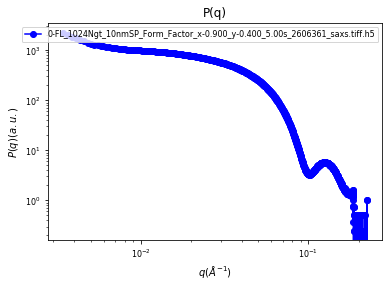

In [36]:

fig, ax = plt.subplots()
i=0
for fp in flist:     
    print(i, fp)
    #resi = h5todict( inDir + fp )  
    #qi= resi['ciravg']['data'][:,0]     
    #pqi=resi['ciravg']['data'][:,1]             
    qi = q0
    pqi = pq0
    plot1D(x=qi,y=  pqi  , ax=ax, logy= True, legend_size=8,
           c= colors[i], m= markers[i], legend='%s-%s'%(i,fp )  )
    i += 1    
ax.set_xscale('log')
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$P(q) (a.u.)$')
ax.set_title( 'P(q)')

In [37]:
print(flist_all)

['FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff.h5']


## 2) Check One Scattering Data

In [40]:
uid = 'BM_191025_PC2'

flist = np.sort( ls_dir( inDir, have_list=[   uid , 'dat','2607158'  ], exclude_list=['waxs', 'AgBH', 'csv', 'png',
                                                                              '2606431', 
                                                                              '2606432',]) ) 

print(len(flist))
print(flist)

60
['BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000000_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000001_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000002_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000003_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000004_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000005_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000006_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000007_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000008_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000009_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000010_saxs.dat'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000011_saxs.dat'
 'BM_191025_PC2_new_perio

In [41]:
fp = 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000000_saxs.dat'


In [42]:
#res = h5todict(  inDir + fp   )


In [43]:
#Plot_SAXS_Data_Reduction( res['md']['io']['out']['filename']  ) 

### Label peaks for simple structures ( availabe phases: SC, BCC, FCC, HCP, NA (unknown) )

In [52]:
search_qmax_range = [0.008, 0.0098 ]

phase = 'FCC'
#phase = 'NA'
#phase = 'SC'

In [53]:
#q= res['ciravg']['data'][:,0]     
#iq=res['ciravg']['data'][:,1] 

d = np.loadtxt( inDir + fp , skiprows=1, )
q = d[:,0]
iq = d[:,2] 


if len(q)!=len(q0):
    pqc=np.interp( q, q0, pq0)
else:
    pqc=pq0
    
qpeak, iqm = find_max_peak( q, iq, search_qmax_range )

<IPython.core.display.Javascript object>


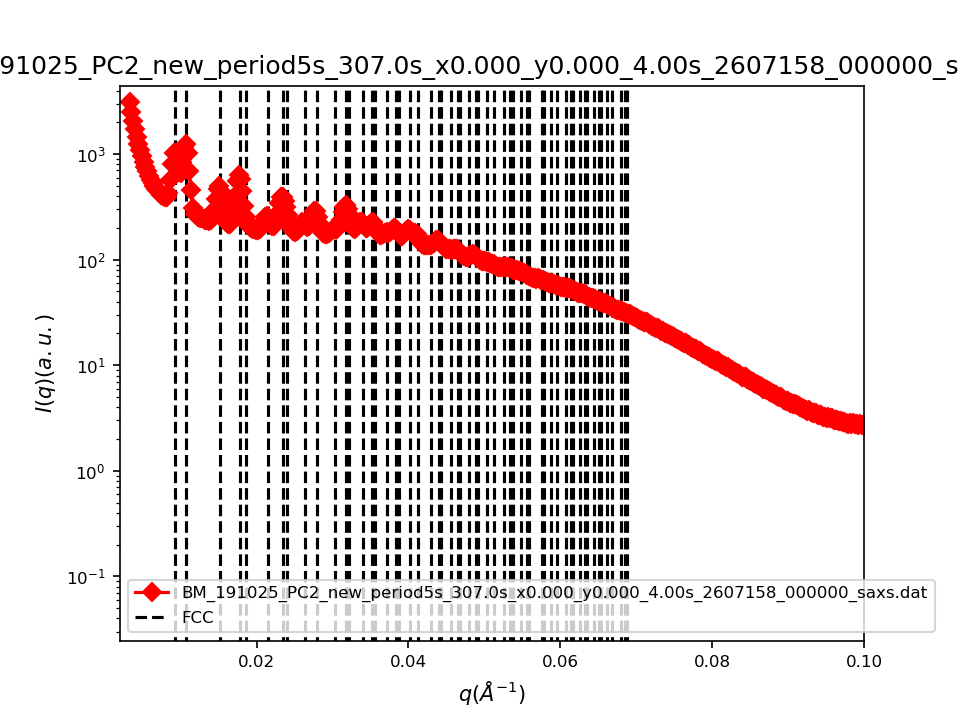

/opt/anaconda3/envs/pyScattering/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


(0.024572887091146033, 4379.077192982456)

In [54]:
fig, ax = plt.subplots()    
plot1D(x=q,y=   iq  , ax=ax, logy=True, c=colors[i], m= markers[i], legend=fp, xlim=[0.002,0.1] )
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$I(q) (a.u.)$')
ax.set_title( fp)    
if phase!='NA':
    ax.vlines( Peak_Dict[phase]*qpeak, 0, 1e4, linestyle='--', color='k',  label= phase  )
ax.legend(loc = 'best', fontsize= 8 )
ax.set_ylim( iq.min(), iq.max()*1.4)

### Get Sq

* Plot pq and iq together

<IPython.core.display.Javascript object>


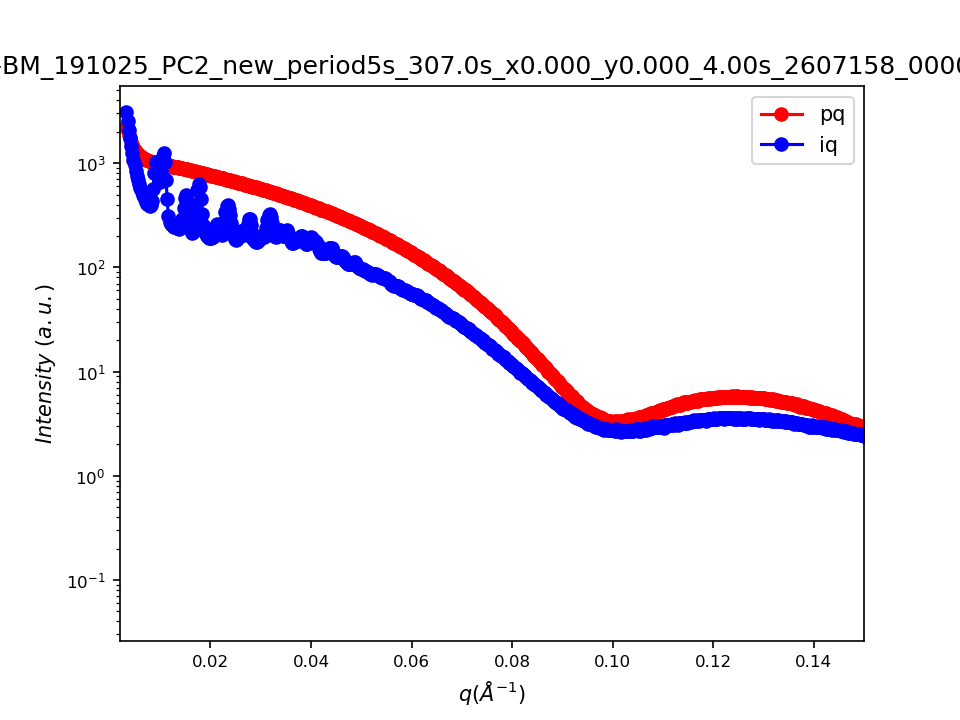

Text(0.5, 1.0, 'I(q) & P(q)-BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000000_saxs.dat')

In [55]:
fig, ax = plt.subplots()
plot1D(x=q,y=pqc  , ax=ax, logy=True, c='r', m='o', legend='pq')
plot1D(x=q,y=iq   , ax=ax, logy=True, c='b', m='o', legend='iq',  xlim=[0.002, 0.15],  )

ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$Intensity\ (a.u.)$')
ax.set_title( 'I(q) & P(q)-%s'%fp)

* Define parameters for the calculatoin of sq  

In [63]:
iq_bg = 1  #acount the background using a scalar
pq_bg = 1  #acount the background using a scalar
qstart_scale = 0.025  #qstart value for scale iq
qend_scale = 0.05     #qend value for scale iq
qstart_bg = 0.08          #qstart value for match iq and pq 
qend_bg = 0.12           #qstart value for match iq and pq 

qplot_range = [0.002, 0.12]
sqplot_range = [0.01, 5]
iqplot_range = [ 5,1e6]


## Get Sq for ciravg

In [64]:
#y = np.interp(q2, q, iq) 
qX, SqX, iq_scaleX, pq_scaleX = get_Sq_from_Iq_Pq( q, iq + iq_bg , pqc + pq_bg ,
                                                qstart_scale =qstart_scale,qend_scale=qend_scale,
                                                qstart_bg=qstart_bg, qend_bg= qend_bg) 

df_ciravg = trans_data_to_pd( [ qX, SqX], label=[ 'q_saxs', 'sq_saxs'] ,dtype= 'list' ) 
df_ciravg.to_csv( outDir + '%s_q_Sq.csv'%fp )

 

k for Sq scale is: 0.40772021806712744
background for Sq scale is: 5.01209684815633


[5, 1000000.0]


<IPython.core.display.Javascript object>


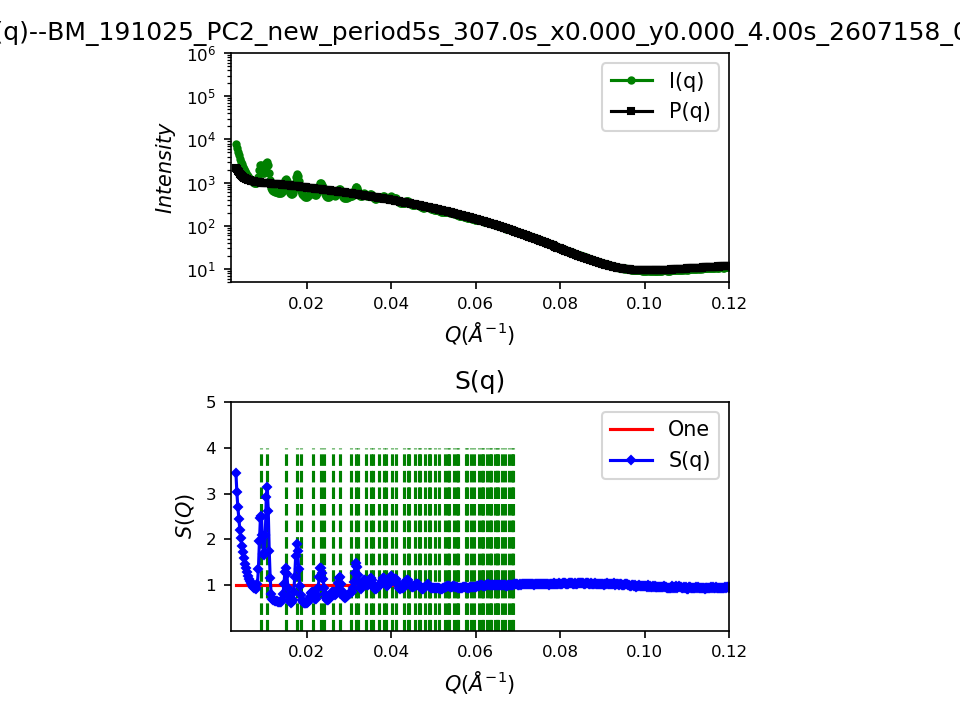

In [65]:
plot_iq_pq_sq( qX, iq_scaleX, pq_scaleX, SqX,xlim=qplot_range, 
              sq_limit=sqplot_range, iq_limit=iqplot_range,
              phase= phase, peak_int=[ 4 ],   qmax= qpeak,           
               title = fp[:-8], filename= outDir + 'Sq_%s'%fp[:] ,save= True )#False)#True)  

In [67]:
t0 = time.time() 
for i, fp in enumerate( flist ):      
    print(i, fp)
    if True:        
        d = np.loadtxt( inDir + fp , skiprows=1, )
        q = d[:,0]
        iq = d[:,2] 
        #y = np.interp(q2, q, iq) 
        qX, SqX, iq_scaleX, pq_scaleX = get_Sq_from_Iq_Pq( q, iq + iq_bg , pqc + pq_bg ,
                                                        qstart_scale =qstart_scale,qend_scale=qend_scale,
                                                        qstart_bg=qstart_bg, qend_bg= qend_bg) 

        df_ciravg = trans_data_to_pd( [ qX, SqX], label=[ 'q_saxs', 'sq_saxs'] ,dtype= 'list' ) 
        df_ciravg.to_csv( outDir + '%s_q_Sq.csv'%fp )
    
 
run_time( t0 )  

0 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000000_saxs.dat
k for Sq scale is: 0.40772021806712744
background for Sq scale is: 5.01209684815633
1 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000001_saxs.dat
k for Sq scale is: 0.4036333052271104
background for Sq scale is: 5.078761812868641
2 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000002_saxs.dat
k for Sq scale is: 0.4025566647638902
background for Sq scale is: 5.104084845278563
3 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000003_saxs.dat
k for Sq scale is: 0.4044090810619081
background for Sq scale is: 5.061533517625967
4 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000004_saxs.dat
k for Sq scale is: 0.4060020013397317
background for Sq scale is: 5.038627766740659
5 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000005_saxs.dat
k for Sq scale is: 0.40111020740230074
background for Sq scale is: 5.110763969450937
6 BM_191025_PC2

55 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000055_saxs.dat
k for Sq scale is: 0.38823850993890113
background for Sq scale is: 5.390279820123175
56 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000056_saxs.dat
k for Sq scale is: 0.3885402526471629
background for Sq scale is: 5.371020238368081
57 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000057_saxs.dat
k for Sq scale is: 0.386195041456207
background for Sq scale is: 5.429222846301701
58 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000058_saxs.dat
k for Sq scale is: 0.38433054227739294
background for Sq scale is: 5.422200167975897
59 BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000059_saxs.dat
k for Sq scale is: 0.37908414676297586
background for Sq scale is: 5.553228385138254
Total time: 1.120 sec


In [66]:
outDir

'/home/yuzhang/Results/Brian/'

## Get Sq for phi-cut iqs

In [ ]:
plot_sqs = False
sqs_yshift = 3


In [ ]:
q= res['qphi']['iqs']['data'][:,0]     
iqs= res['qphi']['iqs']['data']
label_iqs  = res['qphi']['iqs']['label']
Nang=len(label_iqs)-1
sqs=np.zeros_like(iqs)
sqs[:,0]=q
label_sqs =  label_iqs
print(Nang)
if len(q)!=len(q0):
    pqi=np.interp( q, q0, pq0)
else:
    pqi=pq0

In [ ]:
for i in range(  Nang ):    
    lab = label_iqs[i+1]
    qX, SqX, iq_scaleX, pq_scaleX = get_Sq_from_Iq_Pq( q, iqs[:,i] + iq_bg , pqi + pq_bg ,
                                                qstart_scale =qstart_scale,qend_scale=qend_scale,
                                                qstart_bg=qstart_bg, qend_bg= qend_bg, verbose=False) 
    sqs[:,i+1]=SqX
    if plot_sqs:
        plot_iq_pq_sq( qX, iq_scaleX, pq_scaleX, SqX,xlim=qplot_range, 
              sq_limit=sqplot_range, iq_limit=iqplot_range,
              phase= phase, peak_int=[ 4 ],   qmax= qpeak,           
               title = fp[:-7] + lab, filename= outDir + 'Sq_%s_Ang_%s'%(fp[:], lab) ,save= True )#False)#True)  
    
df_sqs = trans_data_to_pd( sqs, label=label_sqs ,dtype= 'array' )   
df_sqs.to_csv( outDir + '%s_q_Sqs.csv'%fp )   

In [ ]:
fig, ax = plt.subplots()
for i in range( Nang):    
    plot1D( x = sqs[:,0], y = sqs[:,i+1] + sqs_yshift *i, yerr= None, logy= False, 
             ylim= [ sqplot_range[0] , sqplot_range[1] +sqs_yshift * (Nang) ], 
              xlim=qplot_range,  ax=ax, legend=label_sqs[i+1], title=fp[:-7] + '_Sq(AngCut)',
                       c=colors[i], m = markers[i],   markersize= 3 ) 

ax.vlines( Peak_Dict[phase]*qpeak, 0, 30, linestyles='--', colors='g',   label= phase ) 
     
ax.set_xlabel( r'$q (\AA^{-1})$')
ax.set_ylabel(r'$Sq\ (a.u.)$')
fig.savefig( outDir + 'Sqs_%s.png'%fp[:]  )    

Res =  { 'ciravg': {'data': df_ciravg, 'label': [ 'q_saxs', 'sq_saxs']  } , 
          'qphi':    {'data': df_sqs, 'label': label_sqs   },
              }  
dicttoh5( Res, inDir + fp, h5path="/sq/", mode='a', overwrite_data = True ) 


# Put all the parameters together for running batch analysis

In [ ]:
saxs_data_analysis_pargs={}
saxs_data_analysis_pargs['form_factor_filename'] = form_factor_filename
saxs_data_analysis_pargs['iq_bg'] = iq_bg
saxs_data_analysis_pargs['pq_bg'] = pq_bg
saxs_data_analysis_pargs['qstart_scale'] = qstart_scale
saxs_data_analysis_pargs['qend_scale'] = qend_scale
saxs_data_analysis_pargs['qstart_bg'] =qstart_bg
saxs_data_analysis_pargs['qend_bg']  = qend_bg
saxs_data_analysis_pargs['outDir']= outDir


saxs_data_plot_pargs={}
saxs_data_plot_pargs['search_qmax_range'] =search_qmax_range
saxs_data_plot_pargs['phase']  = phase
saxs_data_plot_pargs['qplot_range'] = qplot_range
saxs_data_plot_pargs['sqplot_range'] =sqplot_range
saxs_data_plot_pargs['iqplot_range'] = iqplot_range
saxs_data_plot_pargs['plot_sqs'] = plot_sqs
saxs_data_plot_pargs['sqs_yshift'] = sqs_yshift
saxs_data_plot_pargs['outDir']= outDir


# Define the parameter for papermill

In [ ]:
uid_list =  [  '63302744-cdca-43a8-9080_000123.tiff.h5'   ]



## Get SQ for multi-data

In [ ]:
t0 = time.time() 
for i, fp in enumerate(uid_list ):      
    print(i, fp)
    if True:
    #try: 
        Run_SAXS_SQ_Data_Aanalysis( inDir + fp ,   saxs_data_analysis_pargs,    verbose=True,   ) 
        Plot_SAXS_SQ_Data_Aanalysis(  inDir + fp ,   saxs_data_plot_pargs    )

    #except:
    #    print('Something wrong with this data: %s'%fp)
run_time( t0 )      

In [ ]:
#%run -i ~/pyScatt_link/pyScatt/saxs.py

# The END!